\textbf{Ordinary Least Squares Regression}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, uniform, chi2, f

# The Normal Equations
## MLE Derivation
Under frequentist assumptions, we have random variables $X$, $Y$, and $\epsilon$ related by the equation
\begin{equation*}
Y = \beta_0 + \beta_1 X + \epsilon.
\end{equation*}
Here, $X$ comes from any distribution (with finite variance) and $\epsilon \sim \mathcal{N}\left(0,\sigma_{\epsilon}^2\right)$ is independent of $X$. The parameters $\beta_0$ and $\beta_1$ are regarded as fixed real numbers. If we are only able to observe samples in the paired form $\left({X_i,Y_i}\right)$, how do we estimate $\beta_0$ and $\beta_1$? The canonical approach begins with the distribution of $Y$ conditioned on $X$. Whenever we are given $X$, we may write
\begin{equation*}
Y|X \sim \mathcal{N}\left({\beta_0 + \beta_1 X, \sigma_{\epsilon}^2}\right).
\end{equation*}
For each $Y_i|X_i \sim \mathcal{N}\left({\beta_0 + \beta_1 X_i, \sigma_{\epsilon}^2}\right)$, we have the probability density function
\begin{align*}
f_{Y_i}\left({y_i}\middle|x_i\right) = \frac{1}{\sqrt{2\pi \sigma_{\epsilon}^2}}\exp\left({-\frac{1}{2\sigma_{\epsilon}^2}\left({y_i-\left({\beta_0 + \beta_1 x_i}\right)}\right)^2}\right), && y_i \in \mathbb{R}.
\end{align*}
The joint probability mass function (and also the likelihood function) is
\begin{align*}
\mathcal{L}\left({\beta_0,\beta_1}\right) &= f_{Y_1,\dots,Y_n}\left({y_1,\dots,y_n}\middle|{x_1,\dots,x_n}\right) \\
&= \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi \sigma_{\epsilon}^2}}\exp\left({-\frac{1}{2\sigma_{\epsilon}^2}\left({y_i-\left({\beta_0 + \beta_1 x_i}\right)}\right)^2}\right) \\
&= \left({2\pi\sigma_{\epsilon}^2}\right)^{-\frac{n}{2}}\exp\left({-\frac{1}{2\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({y_i-\left({\beta_0 + \beta_1 x_i}\right)}\right)^2}\right).
\end{align*}
The log-likelihood is
\begin{equation}
\log \mathcal{L}\left({\beta_0,\beta_1}\right) = -\frac{n}{2}\log\left({2 \pi \sigma_{\epsilon}^2}\right) - \frac{1}{2\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({y_i-\left({\beta_0 + \beta_1 x_i}\right)}\right)^2. \label{llh}
\end{equation}
We constrain the score function so that $\nabla \log \mathcal{L}\left({\beta_0,\beta_1}\right) = \mathbf{0}$, or
\begin{align*}
0 &= \frac{\partial}{\partial \beta_0}\log \mathcal{L}\left({\beta_0,\beta_1}\right) \\
0 &= \frac{\partial}{\partial \beta_1}\log \mathcal{L}\left({\beta_0,\beta_1}\right),
\end{align*}
\noindent and simplifications yield the so-called normal equations:
\begin{align}
0 &= \sum_{i=1}^{n}\left({Y_i-\left({b_{0}+b_1 X_i}\right)}\right) \label{ne1} \\
0 &= \sum_{i=1}^{n}X_i\left({Y_i-\left({b_0+b_1 X_i}\right)}\right). \label{ne2}
\end{align}
Here, the notation $b_0$ and $b_1$ in place of $\beta_0$ and $\beta_1$ indicates that we have selected estimators of our parameters.

\begin{remark}
Unless stated otherwise, parameters will be denoted by Greek letters ($\beta$,$\sigma$,$\rho$) and their estimators  will be denoted by their corresponding Latin letters ($b$,$s$,$R$). For any random variable $T$, we denote the population mean by
\begin{equation*}
\mu_T = \mathbb{E}\left[{T}\right],
\end{equation*}
the population variance by
\begin{equation*}
\sigma^2_T = \mathrm{Var}\left({T}\right) = \mathbb{E}\left[{\left({T-\mu_{T}}\right)^2}\right],
\end{equation*}
and the population standard deviation by
\begin{equation*}
\sigma_T = \sqrt{\mathrm{Var}\left({T}\right)}.
\end{equation*}
Likewise, we denote the sample variance by
\begin{equation*}
s^2_T = \frac{1}{n-1}\sum_{i=1}^{n}\left({T_i-\bar{T}}\right)^2,
\end{equation*}
and the sample standard deviation by
\begin{equation*}
s_T = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}\left({T_i-\bar{T}}\right)^2}.
\end{equation*}
\end{remark}

\begin{remark}
To simplify notation, we shall consider the sample $X_1,\dots,X_n$ to be observed and fixed (IE, not random), unless specified otherwise. However, we must be careful in doing so. For example,
\begin{equation*}
\sigma_{Y|X}^2 = \sigma_{\epsilon}^2,
\end{equation*}
but
\begin{equation*}
\sigma_{Y}^2 \neq \sigma_{\epsilon}^2.
\end{equation*}
In particular,
\begin{align*}
\sigma_{Y}^2 &= \mathrm{Var}\left({Y}\right) \\
&= \mathrm{Var}\left({\beta_0 + \beta_1 X + \epsilon}\right) \\
&= \beta_1^2\mathrm{Var}\left({X}\right) + \mathrm{Var}\left({\epsilon}\right) \\
&= \beta_1^2\sigma^2_{X} + \sigma^2_{\epsilon}.
\end{align*}
\end{remark}

\begin{remark}
An alternative derivation of the normal equations begins with the optimization objective
\begin{equation*}
\begin{bmatrix}
b_0 \\
b_1
\end{bmatrix} = \arg\min_{b_0,b_1}\sum_{i=1}^{n}\left({Y_i-\left({b_0+b_1X_i}\right)}\right)^2.
\end{equation*}
The quantity
\begin{equation*}
\sum_{i=1}^{n}\left({Y_i-\left({b_0+b_1X_i}\right)}\right)^2
\end{equation*}
is known as the sum of squared errors and shall be revisited in a later section.
\end{remark}

## The Residuals

\begin{definition}
For each $i$, define
\begin{equation*}
\hat{Y}_i \equiv b_0 + b_1X_i,
\end{equation*}
and
\begin{equation*}
\hat{\epsilon}_{i} \equiv Y_{i} - \hat{Y}_{i}.
\end{equation*}
\end{definition}

\begin{corollary}
\begin{align}
& \sum_{i=1}^{n}\hat{\epsilon}_{i} = 0 \label{8:38 11/14/2019} \\
& \sum_{i=1}^{n}X_i\hat{\epsilon}_{i} = 0 \label{8:39 11/14/2019} \\
& \sum_{i=1}^{n}\left({X_i-\bar{X}}\right)\hat{\epsilon}_{i} = 0 \label{8:40 11/14/2019} \\
& \sum_{i=1}^{n}\hat{Y}_i\hat{\epsilon}_{i} = 0. \label{8:41 11/14/2019}
\end{align}
\end{corollary}

\begin{proof}
Equation \eqref{8:38 11/14/2019} results from the first normal equation \eqref{ne1}, and \eqref{8:39 11/14/2019} results from the second \eqref{ne2}. If $\sum_{i=1}^{n}\hat{\epsilon}_{i}$ is zero, then so too is $\bar{X}\sum_{i=1}^{n}\hat{\epsilon}_{i}$. The difference of this and \eqref{8:39 11/14/2019} produces \eqref{8:40 11/14/2019}. Equation \eqref{8:41 11/14/2019} is a linear combination of equations \eqref{8:38 11/14/2019} and \eqref{8:39 11/14/2019}.
\end{proof}

## The Coefficient Estimators

\begin{theorem}
The estimators that satisfy the normal equations are
\begin{align}
b_0 &= \bar{Y} -  b_1\bar{X}  \label{7:20 11/26/2019}.\\
b_1 &= \frac{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)\left({Y_i-\bar{Y}}\right)}{\sum_{j=1}^{n}\left({X_j-\bar{X}}\right)^2} \label{9:35 11/14/2019}.
\end{align}
\end{theorem}

\begin{proof}
From the first normal equation \eqref{ne1}, we have
\begin{align*}
0 &= \sum_{i=1}^{n}\left({Y_i-\left({b_0+b_1 X_i}\right)}\right) \\
&= \sum_{i=1}^{n}Y_i - nb_0 - b_1\sum_{i=1}^{n}X_i.
\end{align*}
Dividing both sides by $n$ produces
\begin{align*}
0 &= \bar{Y} - b_0 - b_1\bar{X} \\
b_0 &= \bar{Y}- b_1\bar{X},
\end{align*}
and hence \eqref{9:35 11/14/2019}. Now,
\begin{align*}
Y_i &= \underbrace{Y_i - \hat{Y}_i}_{\hat{\epsilon}_i} + \hat{Y}_i \\
&= b_0+b_1X_i + \hat{\epsilon}_i.
\end{align*}
Substituting $b_0 = \bar{Y}- b_1\bar{X}$ into this produces
\begin{equation*}
Y_i - \bar{Y}= b_1\left({X_i-\bar{X}}\right) + \hat{\epsilon}_i.
\end{equation*}
Multiply both sides by $\left({X_i - \bar{X}}\right)$ to attain
\begin{equation*}
\left({X_i - \bar{X}}\right)\left({Y_i - \bar{Y}}\right) = b_1\left({X_i-\bar{X}}\right)^2 + \left({X_i - \bar{X}}\right)\hat{\epsilon}_i.
\end{equation*}
Since this is true for all indices $i$, we can sum over all indices
\begin{equation*}
\sum_{i=1}^{n}\left({X_i - \bar{X}}\right)\left({Y_i - \bar{Y}}\right) = b_1\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2 + \underbrace{\sum_{i=1}^{n}\left({X_i - \bar{X}}\right)\hat{\epsilon}_i}_{0}.
\end{equation*}
Solving for $b_1$, we see
\begin{equation*}
b_1 = \frac{\sum_{i=1}^{n}\left({X_i - \bar{X}}\right)\left({Y_i - \bar{Y}}\right)}{\sum_{j=1}^{n}\left({X_j-\bar{X}}\right)^2}.
\end{equation*}
\end{proof}

\begin{remark}
It still remains to show that our selection of $b_0$ and $b_1$ maximizes the likelihood function. This can be shown using the second derivative test, but we omit details as they are not important.
\end{remark}

\begin{remark}
The $\bar{Y}$ in the above expression is not even necessary since
\begin{align*}
\frac{\sum_i \left({X_i - \bar{X}}\right)\left({Y_i-\bar{Y}}\right)}{\sum_j \left({X_j - \bar{X}}\right)^2} &= 
\frac{\sum_i \left({X_i - \bar{X}}\right)Y_i}{\sum_j \left({X_j - \bar{X}}\right)^2} - \frac{\sum_i \left({X_i - \bar{X}}\right)\bar{Y}}{\sum_j \left({X_j - \bar{X}}\right)^2} \\
&= \frac{\sum_i \left({X_i - \bar{X}}\right)Y_i}{\sum_j \left({X_j - \bar{X}}\right)^2} - \frac{\bar{Y}}{\sum_j \left({X_j - \bar{X}}\right)^2}\underbrace{\sum_{i=1}^{n} \left({X_i - \bar{X}}\right)}_{0} \\
&= \frac{\sum_i \left({X_i - \bar{X}}\right)Y_i}{\sum_j \left({X_j - \bar{X}}\right)^2}.
\end{align*}
Furthermore,
\begin{equation}
\frac{\sum_i \left({X_i - \bar{X}}\right)Y_i}{\sum_j \left({X_j - \bar{X}}\right)^2}
= \sum_{i=1}^{n}\underbrace{\frac{X_i-\bar{X}}{\sum_{j}\left({X_j-\bar{X}}\right)^2}}_{k_i}Y_i.
\label{9:05 11/15/2018}
\end{equation}
We immediately see that $b_1$ is a linear combination of $Y_i$, with constants 
\begin{equation*}
k_i = \frac{X_i-\bar{X}}{\sum_{j=1}^{n}\left({X_j-\bar{X}}\right)^2}.
\end{equation*}
Hereafter, we shall use $b_1$ as it appears in the form \eqref{9:05 11/15/2018}.
\end{remark}

\begin{remark}
An alternative derivation for $b_1$ proceeds as follows: Let us consider $X$ to be a random variable that is independent of $\epsilon$. We have
\begin{align*}
\mathrm{Cov}\left({X,Y}\right)
&= \mathrm{Cov}\left({X,\beta_0 + \beta_1 X + \epsilon}\right) \\
&= \underbrace{\mathrm{Cov}\left({X,\beta_0}\right)}_{0} + \beta_1\mathrm{Cov}\left({X,X}\right) + \underbrace{\mathrm{Cov}\left({X,\epsilon}\right)}_{0} \\
&= \beta_1 \mathrm{Var}\left({X}\right),
\end{align*}
which gives
\begin{equation}
\beta_1 = \frac{\mathrm{Cov}\left({X,Y}\right)}{\mathrm{Var}\left({X}\right)} = \frac{\sigma_{XY}^2}{\sigma_{X}^2}. \label{4:55 11/22/2019}
\end{equation}
Substitution of the estimators
\begin{align*}
s_{XY}^2 &= \frac{1}{n-1}\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)\left({Y_i-\bar{Y}}\right) \\
s_{X}^2 &= \frac{1}{n-1}\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2
\end{align*}
into \eqref{4:55 11/22/2019} produces \eqref{9:35 11/14/2019}. Thus, $b_1$ can be written as
\begin{equation}
b_1 = \frac{s_{XY}^{2}}{s_{X}^2}.
\end{equation}
\end{remark}

## Example
Take $10^2$ points from
* $X \sim \mathrm{Unif}\left({0,10}\right)$
* $\beta_0 = 1$
* $\beta_1 = 2$ 
* $\sigma = 1.5$.

In [2]:
np.random.seed(0)
n = 10**2; X = uniform.rvs(loc=0,scale=10,size=n)

In [3]:
beta0 = 1; beta1 = 2; sigma = 1.5
Y = norm.rvs(loc = beta0 + beta1*X, scale = sigma)

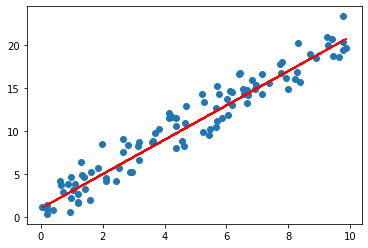

In [4]:
plt.scatter(X,Y); plt.plot(X,beta0 + beta1*X,'r');

Define the estimator functions:

In [5]:
def b1(X,Y):
    k = (X - X.mean()) / sum((X - X.mean())**2)
    return np.dot(Y,k)

In [6]:
def b0(X,Y):
    Ybar = np.dot(Y,np.ones(n))/n
    return Ybar - b1(X,Y)*X.mean()

In [7]:
print(b0(X,Y),beta0)

1.3332266161708475 1


In [8]:
print(b1(X,Y),beta1)

1.9905402532103045 2


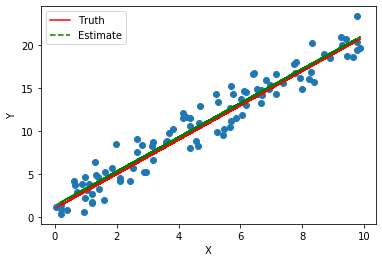

In [9]:
plt.scatter(X,Y)
plt.plot(X,beta0 + beta1*X,'r',label='Truth')
plt.plot(X,b0(X,Y) + b1(X,Y)*X,'g--',label='Estimate')
plt.xlabel('X'); plt.ylabel('Y'); plt.legend();

# The Coefficient Sampling Distributions

## Properties of the $k_i$

\begin{corollary}
For each $i$,
\begin{equation*}
k_i = \frac{X_i-\bar{X}}{\left({n-1}\right)s_{X}^2}.
\end{equation*}
\end{corollary}

\begin{proof}
This follows directly from the substitution of
\begin{equation*}
s_{X}^2 = \frac{1}{n-1}\sum_{j=1}^{n}\left({X_j-\bar{X}}\right)^2
\end{equation*}
into
\begin{equation*}
k_i = \frac{X_i-\bar{X}}{\sum_{j=1}^{n}\left({X_j-\bar{X}}\right)^2}.
\end{equation*}
\end{proof}

\begin{proposition}
\begin{equation*}
\sum_{i=1}^{n}k_i = 0
\end{equation*}
\end{proposition}

\begin{proof}
\begin{align*}
\sum_{i=1}^{n}k_i &= \sum_{i=1}^{n}\frac{X_i-\bar{X}}{\left({n-1}\right)s_{X}^2} \\
&= \frac{1}{\left({n-1}\right)s_{X}^2}\underbrace{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)}_{0} \\
&= 0
\end{align*}
\end{proof}

\begin{proposition}
\begin{equation*}
\sum_{i=1}^{n}k_iX_{i} = 1
\end{equation*}
\end{proposition}

\begin{proof}
\begin{align*}
\sum_{i=1}^{n}k_iX_{i} &= \sum_{i=1}^{n}\left({\frac{X_i-\bar{X}}{(n-1)s^2_X}}\right)X_i \\
&= \frac{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)X_i}{\left({n-1}\right)s_{X}^2} \\
&= \frac{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)X_i}{\left({n-1}\right)s_{X}^2} - \underbrace{\frac{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)\bar{X}}{\left({n-1}\right)s_{X}^2}}_{0} \\
&= \frac{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)\left({X_i-\bar{X}}\right)}{\left({n-1}\right)s_{X}^2} \\
&= \frac{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}{\left({n-1}\right)s_{X}^2} \\
&= 1
\end{align*}
\end{proof}


\begin{proposition}
\begin{equation*}
\sum_{i=1}^{n}k_i^{2} = \frac{1}{\left({n-1}\right)s_X^2}
\end{equation*}
\end{proposition}

\begin{proof}
\begin{align*}
\sum_{i=1}^{n}k_i^2 &= \sum_{i=1}^{n}\left({\frac{X_i-\bar{X}}{(n-1)s_X^2}}\right)^2 \\
&= \frac{1}{(n-1)\left({s_X^2}\right)^2}\underbrace{\sum_{i=1}^{n}\frac{\left({X_i-\bar{X}}\right)^2}{n-1}}_{s_X^2} \\
&= \frac{1}{\left({n-1}\right)s_X^2}
\end{align*}
\end{proof}

\begin{proposition}
Shifting each $X_i$ by the same arbitrary constant $c$ does not change $k_i$.
\end{proposition}

\begin{proof}
Let $k_i'$ be the value of $k_i$ as a function of $X_i'=X_i+c$. We note immediately that
\begin{align*}
\bar{X'} &= \frac{1}{n}\sum_{i=1}^{n}\left({X_i+c}\right) \\
&= \bar{X} + c.
\end{align*}
Thus, $s_X^2$ does not change, since
\begin{equation*}
s_{X'}^2 = \frac{1}{n-1}\sum_{i=1}^{n}\left({X_i'-\bar{X'}}\right)^2 = \frac{1}{n-1}\sum_{i=1}^{n}\left({\left({X_i + c}\right)-\left({\bar{X}+c}\right)}\right)^2 = s_X^2.
\end{equation*}
Hence, the denominator of each $k_i$ is unchanged. The numerator of each $k_i$ also does not change since
\begin{equation*}
X_i' - \bar{X'} = \left({X_i + c}\right) - \left({\bar{X}+c}\right) = X_i - \bar{X}.
\end{equation*}
Thus, each $k_i$ stays the same.
\end{proof}

## Sampling Distribution of $b_1$

\begin{corollary}
Shifting each $X_i$ by the same arbitrary constant $c$ does not change $b_1$.
\end{corollary}
\begin{proof}
Since $b_1=\sum_{i}k_iY_i$, it follows that each $k_i$ being unchanged also leaves $b_1$ unchanged.
\end{proof}

\begin{theorem}
\label{theo:b1unbiased}
$b_1$ is an unbiased estimator of $\beta_1$. That is, $\mathbb{E}\left[{b_1}\right]=\beta_1$.
\end{theorem}

\begin{proof}
\begin{align*}
\mathbb{E}\left[{b_1}\right] &= \mathbb{E}\left[{\sum_{i=1}^{n}k_iY_i}\right] \\
&= \sum_{i=1}^{n}k_i\mathbb{E}\left[{Y_i}\right] \\
&= \sum_{i=1}^{n}k_i\left({\beta_0+\beta_1X_i}\right) \\
&= \beta_0\underbrace{\sum_{i=1}^{n}k_i}_{0} + \beta_1\underbrace{\sum_{i=1}^{n}k_iX_i}_{1} \\
&= \beta_1
\end{align*}
\end{proof}

\begin{theorem}
\label{theo:b1var}
\begin{equation*}
\sigma^2_{b_1} = \frac{\sigma^2_{\epsilon}}{(n-1)s^2_{X}}
\end{equation*}
\end{theorem}

\begin{proof}
\begin{equation*}
\mathrm{Var}\left({b_1}\right) = \mathrm{Var}\left({\sum_{i=1}^{n}k_iY_i}\right) = \underbrace{\sum_{i=1}^{n}k_i^2}_{1/(n-1)s^2_X}\underbrace{\mathrm{Var}\left({Y_i}\right)}_{\sigma^2_{\epsilon}} = \frac{\sigma^2_{\epsilon}}{(n-1)s^2_{X}}
\end{equation*}
Here, we assert that $\mathrm{Var}\left({Y_i}\right) = \sigma^2_{\epsilon}$ on the basis that $X_i$ has already been conditioned upon.
\end{proof}


\begin{theorem}
\label{theo:beta1dist}
\begin{equation*}
b_1 \sim \mathcal{N}\left({\beta_1,\frac{\sigma_{\epsilon}^2}{(n-1)s^2_X}}\right)
\end{equation*}
\end{theorem}

\begin{proof}
We have already shown the mean and variance, so it remains to show the distribution. This follows immediately from the observation that $b_1$ is a linear combination of independent normally distributed $Y_i$, and must therefore also be normally distributed.
\end{proof}

In [10]:
np.random.seed(0)
nsamp = 10**4

In [11]:
varb1 =  sigma**2/np.sum((X-X.mean())**2)
Y = norm.rvs(size=(nsamp,n), loc = beta0 + beta1*X, scale = sigma)
b1samp = b1(X,Y)

In [12]:
x = np.linspace(min(b1samp),max(b1samp),101)
p = norm.pdf(x, loc = beta1, scale = np.sqrt(varb1))

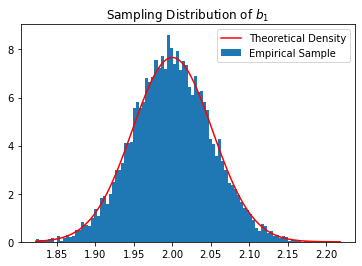

In [13]:
plt.hist(b1samp,bins=100,density=True,label='Empirical Sample')
plt.plot(x,p,label='Theoretical Density',c='r')
plt.title(r'Sampling Distribution of $b_1$'); plt.legend();

## Sampling Distribution of $b_0$

\begin{theorem}
\label{theo:b0unbiased}
$b_0$ is an unbiased estimator of $\beta_0$.
\end{theorem}

\begin{proof}
\begin{equation*}
\mathbb{E}\left[{b_0}\right] = \mathbb{E}\left[{\bar{Y} - b_1\bar{X}}\right] = \mathbb{E}\left[{\bar{Y}}\right] - \mathbb{E}\left[{b_1}\right]\bar{X} = \left({\beta_0 + \beta_1 \bar{X}}\right) - \beta_1 \bar{X} = \beta_0
\end{equation*}
\end{proof}

\begin{remark}
\label{rem:74711272019}
It may be helpful to see
\begin{equation*}
\mathbb{E}\left[{\bar{Y}}\right] = \mathbb{E}\left[{\frac{1}{n}\sum_{i=1}^{n}Y_i}\right] = \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}\left[{Y_i}\right] = \frac{1}{n}\sum_{i=1}^{n}\left({\beta_0 + \beta_1 X_i}\right) = \beta_0 + \beta_1\bar{X}.
\end{equation*}
\end{remark}

\begin{theorem}
\label{theo:varb0}
\begin{equation*}
\sigma^2_{b_0} = \sigma^2_{\epsilon}\left({\frac{1}{n}+\frac{\bar{X}^2}{(n-1)s_X^2}}\right)
\end{equation*}
\end{theorem}

\begin{proof}
\begin{align*}
\mathrm{Var}\left({b_0}\right) &= \mathrm{Var}\left({\bar{Y} - b_1\bar{X}}\right) \\
&= \mathrm{Var}\left({\bar{Y}}\right) + \mathrm{Var}\left({b_1\bar{X}}\right) \\
&= \frac{\sigma_{\epsilon}^2}{n} + \bar{X}^2\mathrm{Var}\left({b_1}\right) \\
&= \frac{\sigma_{\epsilon}^2}{n} + \bar{X}^2\frac{\sigma_{\epsilon}^2}{(n-1)s^2_X} \\
&= \sigma_{\epsilon}^2 \left({\frac{1}{n}+\frac{\bar{X}^2}{(n-1)s^2_X}}\right).
\end{align*}
\end{proof}


\begin{theorem}
\label{theo:beta0dist}
\begin{equation*}
b_0 \sim \mathcal{N}\left({\beta_0, \sigma_{\epsilon}^2 \left({\frac{1}{n}+\frac{\bar{X}^2}{(n-1)s_X^2}}\right)}\right)
\end{equation*}
\end{theorem}

\begin{proof}
We have shown the mean and variance, so it remains to show the distribution. Since each $Y_i$ is normal, so too is $\bar{Y}$ (being a linear combination of $Y_i$). We have established that $b_1$ is normal. If each $X_i$ is known, then $\bar{X}$ is a constant. Thus, $b_0$ is a linear combination of normal random variables, and is also normal.
\end{proof}

In [14]:
varb0 =  sigma**2 * (1/n + (X.mean()**2)/sum((X-X.mean())**2))
b0samp = b0(X,Y)

In [15]:
x = np.linspace(min(b0samp),max(b0samp),101)
p = norm.pdf(x, loc = beta0, scale = np.sqrt(varb0))

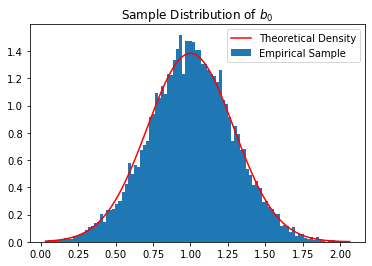

In [16]:
plt.hist(b0samp,bins=100,density=True,label='Empirical Sample')
plt.plot(x,p,label='Theoretical Density',c='r')
plt.title(r'Sample Distribution of $b_0$'); plt.legend();

## The Gauss-Markov Theorem

\begin{lemma}
\label{lem:73111272019}
Let
\begin{equation*}
b_1' = \sum_{i=1}^{n}c_iY_i
\end{equation*}
be another linear unbiased estimator of $\beta_1$. Then,
\begin{align}
\sum_{i=1}^{n}c_i &= 0 \label{80511272019} \\
\sum_{i=1}^{n}c_iX_i &= 1 \label{80611272019} \\
\sum_{i=1}^{n}c_ik_i &= \frac{1}{(n-1)s^2_{X}} \label{80711272019} \\
\sum_{i=1}^{n}\left({c_i-k_i}\right)k_i &= 0. \label{81011272019} 
\end{align}
\end{lemma}

\begin{proof}
Since $b_1'$ is unbiased, we require
\begin{align*}
\beta_1 &= \mathbb{E}\left[{b_1'}\right] \\
&= \mathbb{E}\left[{\sum_{i=1}^{n}c_iY_i}\right] \\
&= \sum_{i=1}^{n}c_i\mathbb{E}\left[{Y_i}\right] \\
&= \sum_{i=1}^{n}c_i\left({\beta_0+\beta_1X_i}\right) \\
&= \beta_0\underbrace{\sum_{i=1}^{n}c_i}_{0} + \beta_1\underbrace{\sum_{i=1}^{n}c_iX_i}_{1}
\end{align*}
This proves \eqref{80511272019} and \eqref{80611272019}. Now,
\begin{align*}
\sum_{i=1}^{n}c_i k_i &= \sum_{i=1}^{n}c_i\left({\frac{X_i-\bar{X}}{(n-1)s^2_X}}\right) \\
&= \frac{1}{(n-1)s^2_X}\underbrace{\sum_{i=1}^{n}c_iX_i}_{1} + \frac{\bar{X}}{(n-1)s^2_X}\underbrace{\sum_{i=1}^{n}c_i}_{0} \\
&= \frac{1}{(n-1)s^2_X}
\end{align*}
and thus \eqref{80711272019}. To see \eqref{81011272019}, consider
\begin{equation*}
\sum_{i=1}^{n}c_ik_i = \frac{1}{(n-1)s^2_X} = \sum_{i=1}^{n}k_i^2.
\end{equation*}
\end{proof}

\begin{theorem}
\label{theo:gmt}
$b_0$ and $b_1$, as have we defined them in \eqref{7:20 11/26/2019} and \eqref{9:35 11/14/2019}, are said to be the best linear unbiased estimators of $\beta_0$ and $\beta_1$, respectively. That is, they have the lowest variance among all linear unbiased estimators of $\beta_0$ and $\beta_1$.
\end{theorem}

\begin{remark}
Actually, the conditions for the Gauss-Markov Theorem are even more general than the ones we present above. In particular, the only restrictions on $\epsilon_i$ we require are
\begin{enumerate}
\item $\epsilon_1,\dots,\epsilon_n$ must be pairwise uncorrelated
\item $\mu_{\epsilon_i} = 0$ for each $i$
\item $\sigma^{2}_{\epsilon_{i}}$ must be the same for each $i$.
\end{enumerate}
Each $\epsilon_i$ need not be normally distributed.
\end{remark}

\begin{proof}
We prove the theorem for $b_1$. Let
\begin{equation*}
b_1' = \sum_{i=1}^{n}c_iY_i
\end{equation*}
be a linear unbiased estimator of $\beta_1$ (not necessarily the one named in \eqref{9:35 11/14/2019}). The variance of $\beta_{1}'$ is
\begin{align*}
\mathrm{Var}\left({b_1'}\right) &= \mathrm{Var}\left({\sum_{i=1}^{n}c_iY_i}\right) \\
&= \sum_{i=1}^{n}c_i\mathrm{Var}\left({Y_i}\right) \\
&= \sum_{i=1}^{n}c_i^2\sigma^2_{\epsilon} \\
&= \sigma^2_{\epsilon}\sum_{i=1}^{n}c_i^2.
\end{align*}
Now,
\begin{align*}
\sum_{i=1}^{n}c_i^2 &= \sum_{i=1}^{n}\left({c_i-k_i+k_i}\right)^2 \\
&= \sum_{i=1}^{n}\left({c_i-k_i}\right)^2 + 2\underbrace{\sum_{i=1}^{n}\left({c_i-k_i}\right)k_i}_{0} + \sum_{i=1}^{n}k_i^2
\end{align*}
so that
\begin{equation*}
\mathrm{Var}\left({b_1'}\right) = \sigma^2_{\epsilon}\sum_{i=1}^{n}\left({c_i-k_i}\right)^2 + \underbrace{\sigma^2_{\epsilon}\sum_{i=1}^{n}k_i^2}_{\sigma^2_{b_1}}.
\end{equation*}
Unless $c_i = k_i$ for each $i$, we have $\mathrm{Var}\left({b_1'}\right) > \mathrm{Var}\left({b_1}\right)$. This proves that $b_1$ has the lowest variance among all unbiased linear estimators of $\beta_1$.
\end{proof}

\begin{remark}
We omit the proof for $b_0$ because it is algebraically involved and somewhat similar to the proof for $b_1$. However, a heuristic argument proceeds as follows: Assume every unbiased estimator $b_0'$ of $\beta_0$ takes the form
\begin{equation*}
b_0' = \bar{Y} - b_1'\bar{X},
\end{equation*}
where $b_1'$ is an unbiased estimator of $\beta_1$. Evaluating the variances of both sides,
\begin{equation*}
\sigma^2_{b_0'} = \sigma^2_{\bar{Y}|\mathbf{x}} + \bar{X}^2\sigma^2_{b_1'}.
\end{equation*}
But $\sigma^2_{\bar{Y}|\mathbf{x}}$ and $\bar{X}^2$ are fixed positive quantities and we have already shown that $\sigma^2_{b_1} \leq \sigma^2_{b_1'}$ for each $b_1'$. We conclude that $b_0' = \bar{Y} - b_1\bar{X}$ has the lowest variance among all linear unbiased estimators of $\beta_0$, but this selection of $b_0$ is exactly \eqref{7:20 11/26/2019}.
\end{remark}

## Joint Sampling Distribution

\begin{lemma}
The random variables $b_1$ and $\bar{Y}$ are uncorrelated.
\end{lemma}

\begin{proof}
We have
\begin{align*}
\mathrm{Cov}\left({b_1,\bar{Y}}\right)
&= \mathrm{Cov}\left({\sum_{i=1}^{n}k_iY_i,\frac{1}{n}\sum_{j=1}^{n}Y_j}\right) \\
&= \frac{1}{n}\sum_{i=1}^{n}k_i\sum_{j=1}^{n}\mathrm{Cov}\left({Y_i,Y_j}\right).
\end{align*} 
Now,
\begin{equation*}
\mathrm{Cov}\left({Y_i,Y_j}\right) =
\begin{cases}
0 & i \neq j \\
\sigma_{\epsilon}^2 & i = j
\end{cases},
\end{equation*}
so for each $i$,
\begin{equation*}
\sum_{j=1}^{n}\mathrm{Cov}\left({Y_i,Y_j}\right) = \sigma_{\epsilon}^2.
\end{equation*}
The sum becomes
\begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}k_{i} \sigma_{\epsilon}^2 = \frac{\sigma_{\epsilon}^2}{n}\underbrace{\sum_{i=1}^{n}k_{i}}_{0} = 0.
\end{equation*}
\end{proof}


\begin{lemma}
\label{lem:covb01}
\begin{equation*}
\sigma^2_{b_{0}b_{1}} = -\bar{X}\sigma^2_{b_1}
\end{equation*}
\end{lemma}

\begin{proof}
\begin{align*}
\mathrm{Cov}\left({b_{0},b_{1}}\right)
&= \mathrm{Cov}\left({\bar{Y}-b_1\bar{X},b_1}\right) \\
&= \underbrace{\mathrm{Cov}\left({\bar{Y},b_1}\right)}_{0} - \bar{X}\mathrm{Cov}\left({b_1,b_1}\right) \\
&= -\bar{X}\mathrm{Var}\left({b_1}\right)
\end{align*}
\end{proof}

\begin{corollary}
\begin{equation*}
\begin{bmatrix}
b_0 \\
b_1 
\end{bmatrix}
\sim
\mathcal{N}\left({
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix},
\begin{bmatrix}
\sigma^2_{b_0} & -\bar{X}\sigma^2_{b_1}\\
-\bar{X}\sigma^2_{b_1} & \sigma^2_{b_1}
\end{bmatrix}
}\right)
\end{equation*}
\end{corollary}

\begin{proof}
The result follows directly from Theorems \ref{theo:beta0dist}, \ref{theo:beta1dist}, and Lemma \ref{lem:covb01}.
\end{proof}

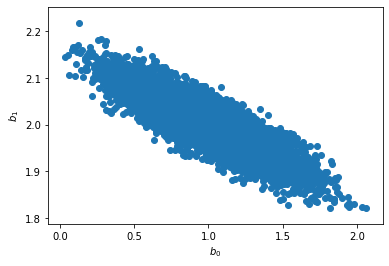

In [17]:
plt.scatter(b0samp,b1samp); plt.xlabel(r'$b_0$'); plt.ylabel(r'$b_1$');

\begin{remark}
If $\bar{X} = 0$, then $b_0$ and $b_1$ are uncorrelated.
\end{remark}

In [18]:
Xc0 = X - X.mean() # To ensure that X is centered at 0.
Yc0 = norm.rvs(size=(nsamp,n), loc = beta0 + beta1*Xc0, scale = sigma)

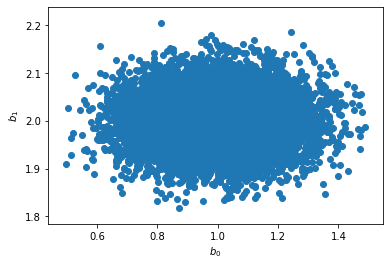

In [19]:
plt.scatter(b0(Xc0,Yc0),b1(Xc0,Yc0)); plt.xlabel(r'$b_0$'); plt.ylabel(r'$b_1$');

# $SSE$, $SST$, and $SSR$

## $SSE$
\begin{definition}
Define the sum of squared errors (also called residual sum of squares) as
\begin{align*}
SSE &\equiv \sum_{i=1}^{n}\hat{\epsilon}_i^2 \\
&= \sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)^2.
\end{align*}
\end{definition}

\begin{lemma}
Shifting each $X_i$ by the same arbitrary constant $c$ does not change SSE.
\end{lemma}

\begin{proof}
If $SSE'$ is the sum of squared errors that results from regressing $Y$ on $X + c$, then
\begin{align*}
SSE' &=\sum_{i=1}^{n}\hat{\epsilon}_i'^2 \\
&= \sum_{i=1}^{n}\left({Y'_i-\hat{Y}'_i}\right)^2 \\
&= \sum_{i=1}^{n}\left({\left({b_0 + b_1\left({X_i + c}\right) + \hat{\epsilon}_i}\right)-\left({b_0 + b_1\left({X_i + c}\right)}\right)}\right)^2 \\
&= \sum_{i=1}^{n}\hat{\epsilon}_i^2 \\
&= SSE.
\end{align*}
\end{proof}

\begin{lemma}
\label{lem:chi2}
\begin{equation*}
\sum_{i=1}^{n}\left({\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}}}\right)^2 \sim \chi^2_n
\end{equation*}
\end{lemma}

\begin{proof}
Since $Y_1,\dots,Y_n$ are independent,
\begin{equation*}
\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}} \sim \mathcal{N}\left({0,1}\right)
\end{equation*}
for each $i$. This implies that
\begin{equation*}
\left(\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}}\right)^2 \sim \chi^2_1.
\end{equation*}
By the independence assumption, we conclude
\begin{equation*}
\sum_{i=1}^{n}\left({\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}}}\right)^2 \sim \chi^2_n.
\end{equation*}
\end{proof}

\begin{theorem}
\label{theo:SSEchi2}
\begin{equation*}
\frac{1}{\sigma_{\epsilon}^2}SSE \sim \chi^2_{n-2}.
\end{equation*}
\end{theorem}

\begin{proof}
Suppose without loss of generality that $\bar{X} = 0$, or otherwise consider $X'_i = X_i - \bar{X}$, since we have shown that SSE is invariant to shifting $X$. We have
\begin{align}
\sum_{i=1}^{n}\left({Y_i-\mathbb{E}\left[{Y_i}\right]}\right)^2 &=
\notag \sum_{i=1}^{n}\left({Y_i-\hat{Y}_i+\hat{Y}_i-\mathbb{E}\left[{Y_i}\right]}\right)^2 \\
&= \sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)^2 + \underbrace{\sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)\left({\hat{Y}_i-\mathbb{E}\left[{Y_i}\right]}\right)}_{(a)} + \underbrace{\sum_{i=1}^{n}\left({\hat{Y}_i-\mathbb{E}\left[{Y_i}\right]}\right)^2}_{(b)}. \label{5:59 11/22/2019}
\end{align}
We consider (a) and (b) in turn. For (a), we have
\begin{align*}
\sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)\left({\hat{Y}_i-\mathbb{E}\left[{Y_i}\right]}\right) &=
\sum_{i=1}^{n}\hat{\epsilon}_i\left({\left({b_0 + b_1X_i}\right)-\left({\beta_0 + \beta_1 X_i}\right)}\right) \\
&= \left({b_0-\beta_0}\right)\underbrace{\sum_{i=1}^{n}\hat{\epsilon}_i}_{0} + \left({b_1-\beta_1}\right)\underbrace{\sum_{i=1}^{n}X_i\hat{\epsilon}_i}_{0} \\
&= 0.
\end{align*}
For (b), we have
\begin{align*}
\sum_{i=1}^{n}\left({\hat{Y}_i-\mathbb{E}\left[{Y_i}\right]}\right)^2 &=
\sum_{i=1}^{n}\left({\left({b_0 + b_1X_i}\right)-\left({\beta_0 + \beta_1 X_i}\right)}\right)^2 \\
&= \sum_{i=1}^{n}\left({\left({b_0-\beta_0}\right)+\left({b_1-\beta_1}\right)X_i}\right)^2 \\
&= \sum_{i=1}^{n}\left({b_0-\beta_0}\right)^2 + 2\left({b_0-\beta_0}\right)\left({b_1-\beta_1}\right)\underbrace{\sum_{i=1}^{n}X_i}_{0} + \left({b_1-\beta_1}\right)^2 \sum_{i=1}^{n}X_i^2 \\
&= n\left({b_0-\beta_0}\right)^2 + \left({b_1-\beta_1}\right)^2 \sum_{i=1}^{n}X_i^2.
\end{align*}
Substituting these back into \eqref{5:59 11/22/2019}, we have
\begin{align*}
\sum_{i=1}^{n}\left({Y_i-\mathbb{E}\left[{Y_i}\right]}\right)^2 &= \sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)^2 +n\left({b_0-\beta_0}\right)^2 + \left({b_1-\beta_1}\right)^2 \sum_{i=1}^{n}X_i^2.
\end{align*}
Now, divide both sides by $\sigma_{\epsilon}^2$:
\begin{align*}
\frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({Y_i-\mathbb{E}\left[{Y_i}\right]}\right)^2 &= \frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)^2 + \frac{n}{\sigma_{\epsilon}^2}\left({b_0-\beta_0}\right)^2 + \frac{1}{\sigma_{\epsilon}^2}\left({b_1-\beta_1}\right)^2 \sum_{i=1}^{n}X_i^2. \\
\sum_{i=1}^{n}\left({\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}}}\right)^2 &= \frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)^2 + \frac{\left({b_0-\beta_0}\right)^2}{\sigma_{\epsilon}^2/n} + \frac{\left({b_1-\beta_1}\right)^2}{\sigma_{\epsilon}^2 /\sum_{i=1}^{n}X_i^2} \\
\underbrace{\sum_{i=1}^{n}\left({\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}}}\right)^2}_{\sim \chi^2_n} &= \frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)^2 + \underbrace{\left({\frac{b_0-\mathbb{E}\left[{b_0}\right]}{\sigma_{b_0}}}\right)^2}_{\sim \chi^2_1} + \underbrace{\left({\frac{b_1-\mathbb{E}\left[{b_1}\right]}{\sigma_{b1}}}\right)^2}_{\sim \chi^2_1}.
\end{align*}
We deduce that if all three quantities on the right hand side are independent (the proof is beyond the scope of this document), then
\begin{equation*}
\frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({Y_i-\hat{Y}_i}\right)^2 \sim \chi^2_{n-2}.
\end{equation*}
\end{proof}

In [20]:
def Yhat(X,Y):
    icpt = np.repeat(b0(X,Y),n).reshape(Y.shape)
    Xb = np.matmul(np.array([b1(X,Y)]).T,np.array([X]))
    return icpt + Xb

In [21]:
def SSE(X,Y):
    return np.sum((Y-Yhat(X,Y))**2, axis=1)

In [22]:
SSE_samp = SSE(X,Y)/sigma**2
x = np.linspace(min(SSE_samp),max(SSE_samp),101); p = chi2.pdf(x,df=n-2)

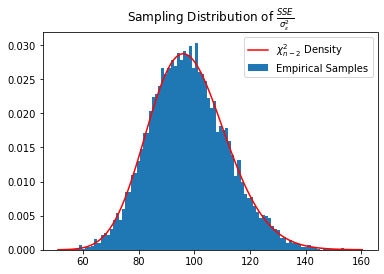

In [23]:
plt.hist(SSE_samp,bins=100, density=True,label='Empirical Samples')
plt.plot(x,p,label=r'$\chi^2_{n-2}$ Density',c='r')
plt.title(r'Sampling Distribution of $\frac{SSE}{\sigma_{\epsilon}^2}$')
plt.legend();

## $SST$
\begin{definition}
Define the Sum of Squares Total as
\begin{equation}
\label{eq:sst}
SST \equiv \sum_{i=1}^{n}\left({Y_i - \bar{Y}}\right)^2 = (n-1)s_Y^{2}.
\end{equation}
\end{definition}

\begin{proposition}
\label{prop:SSTchi2}
If $\beta_1 = 0$, then $\frac{SST}{\sigma_{\epsilon}^2} \sim \chi^2_{n-1}$.
\end{proposition}

\begin{proof}
If $\beta_1 = 0$, then $Y_1,\dots,Y_n$ are IID $\mathcal{N}\left({\beta_0,\sigma_{\epsilon}^2}\right)$. Hence, $\bar{Y} \sim \mathcal{N}\left({\beta_0,\frac{\sigma_{\epsilon}^2}{n}}\right)$, and
\begin{equation*}
\left({\frac{\bar{Y}-\beta_0}{\sigma_{\epsilon}/\sqrt{n}}}\right)^2 \sim \chi^2_1.
\end{equation*}
Applying Lemma \ref{lem:chi2},
\begin{align*}
\sum_{i=1}^{n}\left({\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}}}\right)^2
&= \frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({Y_i-\mathbb{E}\left[{Y_i}\right]}\right)^2 \\
&= \frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({Y_i-\bar{Y}+\bar{Y}-\mathbb{E}\left[{Y_i}\right]}\right)^2 \\
&= \frac{1}{\sigma_{\epsilon}^2}\underbrace{\sum_{i=1}^{n}\left({Y_i-\bar{Y}}\right)^2}_{SST} + \frac{2}{\sigma_{\epsilon}^2}\underbrace{\sum_{i=1}^{n}\left({Y_i-\bar{Y}}\right)\left({\bar{Y}-\mathbb{E}\left[{Y_i}\right]}\right)}_{0} + \frac{1}{\sigma_{\epsilon}^2}\sum_{i=1}^{n}\left({\bar{Y}-\mathbb{E}\left[{Y_i}\right]}\right)^2 \\
&= \frac{SST}{\sigma_{\epsilon}^2} + \frac{n}{\sigma_{\epsilon}^2}\left({\bar{Y}-\mathbb{E}\left[{Y_i}\right]}\right)^2 \\
\underbrace{\sum_{i=1}^{n}\left({\frac{Y_i-\mathbb{E}\left[{Y_i}\right]}{\sigma_{\epsilon}}}\right)^2}_{\chi^2_n}
&= \frac{SST}{\sigma_{\epsilon}^2} + \underbrace{\left({\frac{\bar{Y}-\beta_0}{\sigma_{\epsilon}/\sqrt{n}}}\right)^2}_{\chi^2_1}.
\end{align*}
The last equation leads us to deduce that $\frac{SST}{\sigma_{\epsilon}^2} \sim \chi^2_{n-1}$.
\end{proof}

In [24]:
def SST(X,Y):
    Ybar = np.repeat(Y.mean(axis=1),n).reshape(Y.shape)
    return np.sum((Y - Ybar)**2, axis=1)

In [25]:
np.random.seed(0)
Y0 = norm.rvs(size=(nsamp,n), loc = beta0 + 0*X, scale = sigma)
SST_samp = SST(X,Y0)/sigma**2

In [26]:
x = np.linspace(min(SST_samp),max(SST_samp),101); p = chi2.pdf(x, df = n - 1)

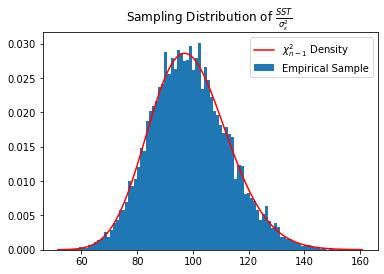

In [27]:
plt.hist(SST_samp,bins=100,density=True,label='Empirical Sample')
plt.plot(x,p,label=r'$\chi^2_{n-1}$ Density',c='r')
plt.title(r'Sampling Distribution of $\frac{SST}{\sigma_{\epsilon}^2}$')
plt.legend();

## $SSR$
\begin{definition}
Define the Sum of Squares due to Regression as
\begin{equation*}
SSR = \sum_{i=1}^{n}\left({\bar{Y} - \hat{Y}_i}\right)^2.
\end{equation*}
\end{definition}

\begin{corollary}
\label{cor:tssrssess}
\begin{equation*}
SST = SSE + SSR.
\end{equation*}
\end{corollary}
\begin{proof}
\begin{align*}
SST &= \sum_{i=1}^{n}\left({Y_i - \bar{Y}}\right)^2 \\
&= \sum_{i=1}^{n}\left({Y_i - \hat{Y_i}+\hat{Y_i}-\bar{Y}}\right)^2 \\
&= \underbrace{\sum_{i=1}^{n}\left({Y_i - \hat{Y_i}}\right)^2}_{SSE} + 2{\underbrace{\sum_{i=1}^{n}\left({Y_i - \hat{Y_i}}\right)\left({\hat{Y_i}-\bar{Y}}\right)}_{0}} + \underbrace{\sum_{i=1}^{n}\left({\hat{Y_i}-\bar{Y}}\right)^2}_{SSR}.
\end{align*}
It may be helpful to see why the middle term vanishes:
\begin{align*}
\sum_{i=1}^{n}\left({Y_i - \hat{Y_i}}\right)\left({\hat{Y_i}-\bar{Y}}\right) &= \sum_{i=1}^{n}\hat{\epsilon}_i\left({\hat{Y_i}-\bar{Y}}\right) \\
&= \sum_{i=1}^{n}\hat{\epsilon}_i\left({\left({b_0+b_1X_i}\right)-\left({b_0 + b_1\bar{X}}\right)}\right) \\
&= b_1\underbrace{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)\hat{\epsilon}_i}_{0}.
\end{align*}
\end{proof}

\begin{corollary}
\label{cor:ssrdist}
If $\beta_1 = 0$, then $\frac{SSR}{\sigma_{\epsilon}^2} \sim \chi^2_1$.
\end{corollary}
\begin{proof}
This follows directly from Theorem \ref{theo:SSEchi2}, Proposition \ref{prop:SSTchi2}, and Corollary \ref{cor:tssrssess}.
\begin{equation*}
\underbrace{\frac{SST}{\sigma_{\epsilon}^2}}_{\chi^2_{n-1}} = \underbrace{\frac{SSE}{\sigma_{\epsilon}^2}}_{\chi^2_{n-2}} + \frac{SSR}{\sigma_{\epsilon}^2}.
\end{equation*}
\end{proof}

In [28]:
def SSR(X,Y):
    Y = np.atleast_2d(Y)
    Ybar = np.repeat(Y.mean(axis=1),n).reshape(Y.shape)
    return np.sum((Yhat(X,Y) - Ybar)**2, axis=1)

In [29]:
SSR_samp = SSR(X,Y0)/sigma**2
x = np.linspace(0.05,max(SSR_samp),101); p = chi2.pdf(x, df = 1)

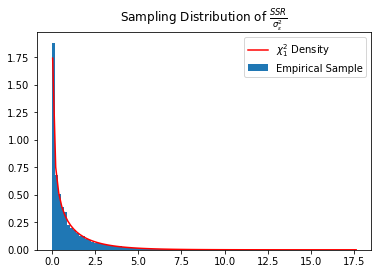

In [30]:
plt.hist(SSR_samp,bins=100,density=True,label='Empirical Sample');
plt.plot(x,p,label=r'$\chi^2_{1}$ Density',c='r')
plt.title(r'Sampling Distribution of $\frac{SSR}{\sigma_{\epsilon}^2}$')
plt.legend();

\begin{proposition}
\begin{equation}
SSR = b_1^2\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2
\label{7:40 11/25/2019}
\end{equation}
\end{proposition}
\begin{proof}
\begin{align*}
SSR &= \sum_{i=1}^{n}\left({\hat{Y_i}-\bar{Y}}\right)^2 \\
&= \sum_{i=1}^{n}\left({\left({b_0+b_1X_i}\right)-\left({b_0 + b_1\bar{X}}\right)}\right)^2 \\
&= b_1^2\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2.
\end{align*}
\end{proof}

\begin{corollary}
\begin{equation}
\label{eq:ssrsx}
SSR = \left({n-1}\right)\frac{\left({s_{XY}^2}\right)^2}{s_{X}^2}
\end{equation}
\end{corollary}

\begin{proof}
The result follows directly from substitutions of
\begin{equation*}
s^2_X = \frac{1}{n-1}\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2
\end{equation*}
and
\begin{equation*}
b_1 = \frac{s^2_{XY}}{s^2_{X}}
\end{equation*}
into \eqref{7:40 11/25/2019}.
\end{proof}

## $R^2$
For this section, we consider $X$ to be random.

\begin{definition}
Define the correlation between $X$ and $Y$ by
\label{def:corr}
\begin{equation*}
\rho_{X,Y} = \frac{\sigma^2_{X,Y}}{\sqrt{\sigma^2_X\sigma^2_{Y}}}
\end{equation*}
\end{definition}

\begin{definition}
\label{def:rest}
Define the correlation estimator by
\begin{equation*}
R = \frac{s^2_{X,Y}}{\sqrt{s^2_{X}s^2_{Y}}}.
\end{equation*}
\end{definition}

\begin{theorem}
\label{theo:r2}
\begin{equation*}
R^2 = \frac{SSR}{SST}
\end{equation*}
\end{theorem}

\begin{proof}
We start from the right hand side. Substituting in \eqref{eq:sst} and \eqref{eq:ssrsx}, we have
\begin{align*}
\frac{SSR}{SST} &= \frac{\left({n-1}\right)\frac{\left({s_{XY}^2}\right)^2}{s_{X}^2}}{(n-1)s_{Y}^2} \\
&= \left({\frac{s_{X,Y}^2}{\sqrt{s_X^2 s_Y^2}}}\right)^2 \\
&= R^2.
\end{align*}
\end{proof}

\begin{remark}
$R$ is interpreted as a measure of fit, where $R=1$ implies perfect positive linear correlation and $R=-1$ implies perfect negative linear correlation. If $R = 0$, then $X$ and $Y$ are said to be perfectly uncorrelated. This should not suggest that there is no relationship between $X$ and $Y$. Instead, it implies that if a relationship does exist, then the relationship is not linear. $R^2$ is interpreted to mean the proportion of variation in $Y$ that the regression line explains \textit{more} than $\bar{Y}$ does by itself.
\end{remark}

# $\sigma^2$ unknown

## The MLE Estimator

\begin{proposition}
The MLE estimator of $\sigma_{\epsilon}^2$ is
\begin{equation}
\label{eq:sigma2hat}
\hat{\sigma}_{\epsilon}^2 = \frac{SSE}{n}.
\end{equation}
\end{proposition}

\begin{proof}
The log-liklihood of the data (refer to equation \eqref{llh}) is
\begin{equation*}
\mathcal{L}\left({\sigma_{\epsilon}^2}\right) = -\frac{n}{2}\log\left({2\pi\sigma_{\epsilon}^2}\right) - \frac{SSE}{2\sigma_{\epsilon}^2}
\end{equation*}
when we use $b_0$ and $b_1$ in place of their parameters. Equation \eqref{eq:sigma2hat} results from imposing the constraint
\begin{equation*}
0 = \frac{\partial}{\partial\sigma_{\epsilon}^2}\mathcal{L}\left({\sigma_{\epsilon}^2}\right)
\end{equation*}
and solving. One may verify using the second derivative test that $\hat{\sigma}_{\epsilon}^2$ is a global maximum.
\end{proof}

\begin{remark}
Although $\hat{\sigma}_{\epsilon}^2$ is the MLE estimator of $\sigma_{\epsilon}^2$, it is biased. We introduce an unbiased estimator next.
\end{remark}

## Mean Squared Error
\begin{definition}
Define the mean squared error as
\begin{equation*}
MSE = \frac{SSE}{n-2}.
\end{equation*}
\end{definition}

\begin{corollary}
\begin{equation*}
\mathbb{E}\left[{MSE}\right] = \sigma^2_{\epsilon}
\end{equation*}
\end{corollary}

\begin{proof}
Since
\begin{equation*}
\frac{SSE}{\sigma^2_{\epsilon}} \sim \chi^2_{n-2},
\end{equation*}
we have
\begin{equation*}
\mathbb{E}\left[{\frac{SSE}{\sigma^2_{\epsilon}}}\right] = n-2,
\end{equation*}
or
\begin{equation*}
\mathbb{E}\left[{\frac{SSE}{n-2}}\right] = \sigma^2_{\epsilon}.
\end{equation*}
\end{proof}

\begin{remark}
\label{rem:84011272019}
Hereafter, we shall use the notation
\begin{equation*}
s^2_{\epsilon} = MSE
\end{equation*}
whenever we speak of an estimator for $\sigma^2_{\epsilon}.$
\end{remark}


In [31]:
def MSE(X,Y):
    return SSE(X,Y)/(n-2)

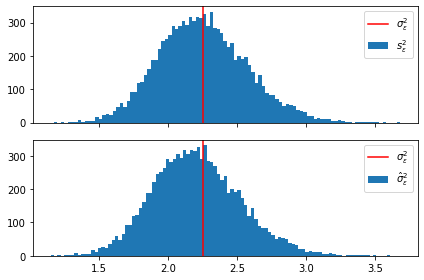

In [32]:
fig, ax = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax[0].hist(MSE(X,Y),bins=100, label = r'$s_{\epsilon}^2$')
ax[0].axvline(x=sigma**2, c = 'r', label = r'$\sigma_{\epsilon}^2$')
ax[0].legend()

ax[1].hist(SSE(X,Y)/n,bins=100, label = r'$\hat{\sigma}_{\epsilon}^2$')
ax[1].axvline(x=sigma**2, c = 'r', label = r'$\sigma_{\epsilon}^2$')
ax[1].legend();

In [33]:
a = np.cumsum(SSE(X,Y)/n)/np.arange(1,nsamp+1)
b = np.cumsum(MSE(X,Y))/np.arange(1,nsamp+1)

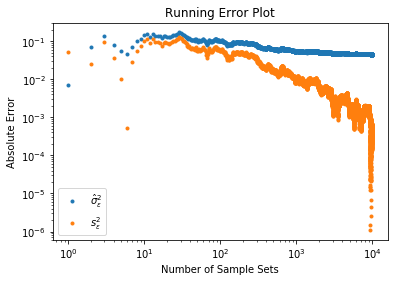

In [34]:
plt.loglog(np.abs(a-sigma**2),'.', label=r'$\hat{\sigma}_{\epsilon}^2$')
plt.loglog(np.abs(b-sigma**2),'.', label=r'$s_{\epsilon}^2$')
plt.xlabel('Number of Sample Sets'); plt.ylabel('Absolute Error');
plt.title('Running Error Plot'); plt.legend();

## Adjusted $b_1$ Sampling Distribution

\begin{definition}
\label{def:se}
Define the variance estimator of $b_1$ as
\begin{equation*}
s_{b_1}^2 = \frac{s^2_{\epsilon}}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}
\end{equation*}
and the standard deviation estimator as
\begin{equation*}
s_{b_1} = \sqrt{s_{b_1}^2} = \sqrt{\frac{s^2_{\epsilon}}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}}.
\end{equation*}
\end{definition}

\begin{corollary}
$s^2_{b_1}$ is an unbiased estimator of $\sigma^2_{b_1}$.
\end{corollary}

\begin{proof}
\begin{align*}
\mathbb{E}\left[{s^2_{b_1}}\right]
&= \mathbb{E}\left[{\frac{s^2_{\epsilon}}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}}\right] \\
&= \frac{\mathbb{E}\left[{s^2_{\epsilon}}\right]}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2} \\
&= \frac{\sigma_{\epsilon}^2}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2} \\
&= \sigma^2_{b_1}
\end{align*}
\end{proof}

\begin{theorem}
\begin{equation*}
\frac{b_1-\beta_1}{s_{b_1}} \sim t_{n-2}
\end{equation*}
\end{theorem}

\begin{proof}
It suffices to show that the above expression is of the form
\begin{equation*}
\frac{Z}{\sqrt{C/(n-2)}},
\end{equation*}
where $Z \sim \mathcal{N}\left({0,1}\right)$ and $C \sim \chi^2_{n-2}$ are independent. We have
\begin{align*}
\frac{b_1-\beta_1}{\sqrt{\frac{MSE}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}}}
&= \underbrace{\frac{b_1-\beta_1}{\sqrt{\frac{\sigma_{\epsilon}^2}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}}}}_{\mathcal{N}(0,1)} \div
\frac{\sqrt{\frac{MSE}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}}}{\sqrt{\frac{\sigma_{\epsilon}^2}{\sum_{i=1}^{n}\left({X_i-\bar{X}}\right)^2}}} \\
&= Z \div \sqrt{\frac{MSE}{\sigma_{\epsilon}^2}} \\
&= Z \div \sqrt{\frac{SSE/(n-2)}{\sigma_{\epsilon}^2}} \\
&= Z \div \sqrt{\frac{SSE/\sigma_{\epsilon}^2}{n-2}},
\end{align*}
but Theorem \ref{theo:SSEchi2} asserts that $SSE/\sigma_{\epsilon}^2 \sim \chi^2_{n-2}$, and we have shown the form. It remains to show independence, but that is beyond the scope of this document.
\end{proof}

In [35]:
def tb1(X,Y):
    A = b1(X,Y) - beta1
    B = MSE(X,Y)/sum((X-X.mean())**2)
    return A/np.sqrt(B)

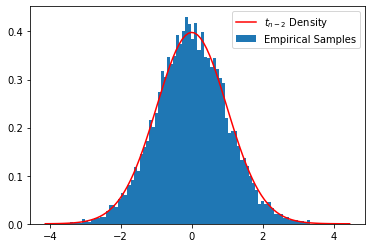

In [36]:
sample = tb1(X,Y)
plt.hist(sample,bins=100, density=True, label = 'Empirical Samples')
x = np.linspace(min(sample),max(sample),101); p = t.pdf(x,df=n-2)
plt.plot(x,p,label=r'$t_{n-2}$ Density',c='r'); plt.legend();

## Adjusted $b_0$ Sampling Distribution

\begin{definition}
\label{def:se}
Define the variance estimator of $b_0$ as
\begin{equation*}
s_{b_0}^2 = s^2_{\epsilon}\left({\frac{1}{n}+\frac{\bar{X}^2}{(n-1)s_X^2}}\right)
\end{equation*}
and the standard deviation estimator as
\begin{equation*}
s_{b_0} = \sqrt{s_{b_0}^2} = \sqrt{s_{\epsilon}^2\left({\frac{1}{n}+\frac{\bar{X}^2}{(n-1)s_X^2}}\right)}.
\end{equation*}
\end{definition}

\begin{theorem}
$s^2_{b_0}$ is an unbiased estimator of $\sigma^2_{b_0}$.
\end{theorem}

\begin{theorem}
\begin{equation*}
\frac{b_0-\beta_0}{s_{b_0}} \sim t_{n-2}
\end{equation*}
\end{theorem}
The proofs are so similar to those of the previous section that we omit them.

## Mean Squares due to Regression
\begin{definition}
Define the mean squares due to regression by
\begin{equation*}
MSR = \frac{1}{(n-1)-(n-2)}\sum_{i=1}^{n}\left({\hat{Y}_i-\bar{Y}}\right)^2 = \sum_{i=1}^{n}\left({\hat{Y}_i-\bar{Y}}\right)^2.
\end{equation*}
\end{definition}

Although this definition may seem redundant, we will see that the distinction between $MSR$ and $SSR$ is necessary for multiple linear regression.

In [37]:
def MSR(X,Y):
    return SSR(X,Y)

# ANOVA

## Motivation
Suppose $\beta_1 = 0$. By Theorem \ref{theo:SSEchi2} and Corollary \ref{cor:ssrdist}, we have that $\frac{SSE}{\sigma_{\epsilon}^2}\sim\chi^2_{n-2}$ and $\frac{SSR}{\sigma_{\epsilon}^2}\sim\chi^2_{1}$. Thus,
\begin{equation*}
\mathbb{E}\underbrace{\left[{\frac{SSE}{n-2}}\right]}_{MSE} = \mathbb{E}\underbrace{\left[{\frac{SSR}{1}}\right]}_{MSR} = \sigma_{\epsilon}^2.
\end{equation*}
If indeed it were the case that $\beta_1 = 0$, we'd expect to see the ratio
\begin{equation*}
\frac{MSR}{MSE}
\end{equation*}
close to $1$.

## Sampling Distribution of $\frac{MSR}{MSE}$

\begin{theorem}
\label{theo:F}
$\frac{MSR}{MSE}$ has an F distribution with $1$ and $n-2$ degrees of freedom.
\end{theorem}

\begin{proof}
It suffices to show that we may express $\frac{MSR}{MSE}$ in the form
\begin{equation*}
\frac{U \div 1}{V \div (n-2)},
\end{equation*}
where $U \sim \chi^2_{1}$ and $V \sim \chi^2_{n-2}$ are independent. We have
\begin{align*}
\frac{MSR}{MSE} &= \frac{SSR \div 1}{SSE \div (n-2)} \\
&= \frac{\frac{SSR}{\sigma_{\epsilon}^2} \div 1}{\frac{SSE}{\sigma_{\epsilon}^2} \div (n-2)},
\end{align*}
and by Theorem \ref{theo:SSEchi2} and Corollary \ref{cor:ssrdist}, we have shown the form. Showing independence is beyond the scope of this document.
\end{proof}

In [38]:
def F(X,Y):
    return MSR(X,Y) / MSE(X,Y)

In [39]:
F_samp = F(X,Y0);
a = 0.05; b = max(F_samp); x = np.linspace(a,b,101); p = f.pdf(x,dfn=1,dfd = n-2)

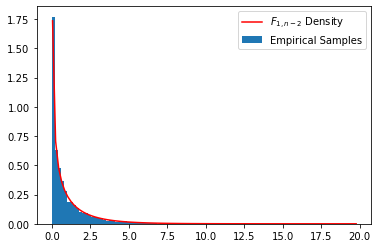

In [40]:
plt.hist(F_samp,bins=101, density = True, label = 'Empirical Samples')
plt.plot(x,p,label=r'$F_{1,n-2}$ Density',c='r'); plt.legend();

\begin{remark}
If $\beta_1 \neq 0$, then we'd see a different distribution of $\frac{MSR}{MSE}$.
\end{remark}

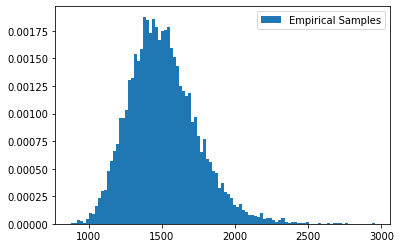

In [41]:
plt.hist(F(X,Y),bins=101, density = True, label = 'Empirical Samples')
plt.legend();

## Relation to the $t$ Distribution

\begin{theorem}
\begin{equation*}
\left({\frac{b_1-\beta_1}{s_{b_1}}}\right)^2 \sim F_{1,n-2}
\end{equation*}
\end{theorem}

\begin{proof}
We have already shown that
\begin{equation*}
\frac{b_1-\beta_1}{s_{b_1}} \sim t_{n-2}.
\end{equation*}
It follows that the square of any $t$ distributed random variable with $\nu$ degrees of freedom has a $F_{1,\nu}$ distribution.
\end{proof}